### Imports

In [1]:
# import matplotlib
# matplotlib.use('tkagg')

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [19]:
from setupOpt import optStudy

In [20]:
%matplotlib inline 

In [21]:
from pymoo.visualization.scatter import Scatter

In [7]:
# checkpointDir = './archive/opt_run-210928-1518/checkpoint.npy'
# checkpointDir = './opt_run/checkpoint.npy'
# plotDir = os.path.join(optStudy.optDatDir, 'plots')

In [23]:
pprint(optStudy.__dict__)

{'BaseCase': <class 'pymooCFD.studies.oscillCyl.OscillCylinder'>,
 'CP_path': 'optStudy-OscillCylinderOpt/OscillCylinderOpt-CP',
 'algorithm': <pymoo.algorithms.moo.nsga2.NSGA2 object at 0x7f1630ac7f10>,
 'archiveDir': 'optStudy-OscillCylinderOpt/archive',
 'base_case_path': 'base_cases/osc-cyl_base',
 'bndCases': [<pymooCFD.studies.oscillCyl.OscillCylinder object at 0x7f1630ad5880>,
 'cornerCases': None,
 'logger': <RootLogger root (DEBUG)>,
 'mapDir': 'optStudy-OscillCylinderOpt/mapGen1',
 'n_CP': 10,
 'n_opt': 20,
 'obj_labels': ['Drag on Cylinder [N]', 'Energy Consumption [J/s]'],
 'optDatDir': 'optStudy-OscillCylinderOpt',
 'optName': 'OscillCylinderOpt',
 'pfDir': 'pareto_front',
 'plotDir': 'optStudy-OscillCylinderOpt/plots',
 'problem': <setupOpt.GA_CFD object at 0x7f1630ac7eb0>,
 'studyDir': 'optStudy-OscillCylinderOpt/mesh_study',
 'test_case': <pymooCFD.studies.oscillCyl.OscillCylinder object at 0x7f1630ae7730>,
 'var_labels': ['Amplitude [1/s]', 'Frequency [1/s]']}


#### Create Directory for Saving Plots

In [6]:
# try: 
#     os.mkdir(plotDir)
# except OSError as err:
#     print(err)

[Errno 17] File exists: './procOpt/plots'


#### Load Data from .npy Checkpoint

In [14]:
# checkpoint, = np.load(checkpointDir, allow_pickle=True).flatten()
# algorithm = checkpoint
# print(algorithm)
checkpoint = optStudy.algorithm

In [12]:
# attributes that are exclusive to current algorithm object
callback = optStudy.algorithm.callback 
hist = checkpoint.result().history
assert hist is not None

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

### Extract Data 

In [15]:
# is the full history of the algorithm saved? 
print('Checkpoint Objective Population:\n', checkpoint.pop.get('F')[:5])
if np.all(checkpoint.pop.get('F')) is not None: 
    algorithm = checkpoint
    print('Checkpoint @ end of generation')
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')
else:
    print('Checkpoint mid-generation')
    print('     "algorithm" variable represents last completed generation')
    print('     "algorithm.callback" unusable with history objects')
    algorithm = checkpoint.history[-1]
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')

AttributeError: 'NoneType' object has no attribute 'get'

In [10]:
print('Number of individuals in final population: ' + str(len(algorithm.pop.get('X'))))
print('Number of generations: ', checkpoint.n_gen, callback.gen, len(checkpoint.history))

Number of individuals in final population: 100
Number of generations:  7 6 5


In [11]:
res = algorithm.result()
assert hist == checkpoint.history
problem = algorithm.problem

In [12]:
latest_pop = algorithm.pop
latest_popX = latest_pop.get('X')
latest_popF = latest_pop.get('F')
if algorithm.n_gen == len(hist):
    latest_gen = algorithm.n_gen

In [13]:
all_obj = [alg.pop.get('F') for alg in hist]
all_var = [alg.pop.get('X') for alg in hist]

In [14]:
# check data extraction
print(res)
# print(hist)
print(len(hist))
# print(algorithm.history)
print(algorithm.save_history)
print(callback)

5
True


### Corner Cases

In [15]:
runCCDir = os.path.join(procOptDir, 'runCC')
ents = os.listdir(runCCDir)
CCobjs = []
CCvars = []
for ent in ents:
    CCDir = os.path.join(runCCDir, ent)
    varPath = os.path.join(CCDir, 'var.txt')
    CCvars.append(np.loadtxt(varPath))
    objPath = os.path.join(CCDir, 'obj.txt')
    CCobjs.append(np.loadtxt(objPath))
CCobjs = np.array(CCobjs)
CCvars = np.array(CCvars)
labels = [f'cc-{i}' for i in range(len(CCvars))]

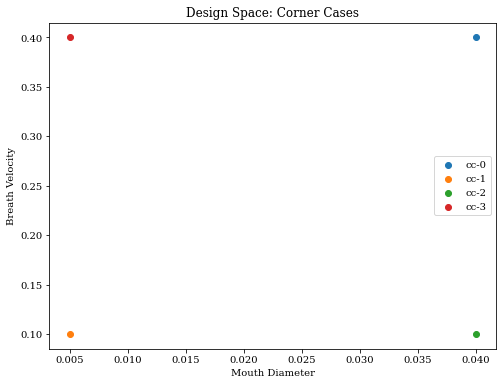

In [16]:
plot = Scatter(title= 'Design Space: Corner Cases', legend = True, labels = var_labels)
for i, CCvar in enumerate(CCvars):
    plot.add(CCvar, label=f'cc-{i}')
plot.show()

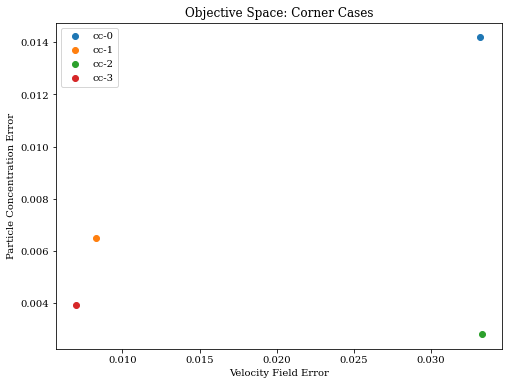

In [17]:
plot = Scatter(title= 'Objective Space: Corner Cases', legend = True, labels = obj_labels)
for i, CCobj in enumerate(CCobjs):
    plot.add(CCobj, label=f'cc-{i}')
plot.show()

In [18]:
# Non-dominated Sorting of Corner Cases
n_survive = 1
F = CCobjs
X = CCvars
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
nds = NonDominatedSorting()
# do the non-dominated sorting until splitting front
fronts = nds.do(F, n_stop_if_ranked=n_survive)
front = fronts[0]
nonDom_CCobj = F[front, :][0]
nonDom_CCvar = X[front, :][0]
print('Non-dominated: Corner Cases')
print('Parameters-', nonDom_CCvar)
print('Objectives-', nonDom_CCobj)

Non-dominated: Corner Cases
Parameters- [0.04 0.1 ]
Objectives- [0.03331341 0.00281708]


In [19]:
# best_obj = min(all(CCobjs))
# hyperVol_refPt = best_obj

In [20]:
# plt.scatter(CCvar[:,0], CCvar[:,1], label=labels)
# plt.title('Design Space: Corner Cases')
# plt.show()

### First Generation

In [21]:
alg = hist[0]
gen = alg.n_gen

#### First Generation: Parameter Space

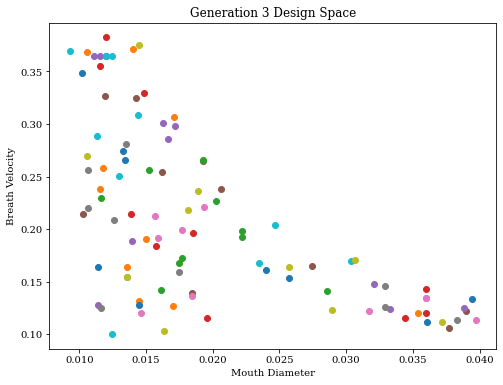

In [22]:
popX = hist[0].pop.get('X')
if len(popX) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Design Space', legend=leg, labels=var_labels)
for ind_i, ind in enumerate(popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(plotDir + '/gen1_var_space.png')
plot.show()

#### First Generation: Objective Space

Generation 3


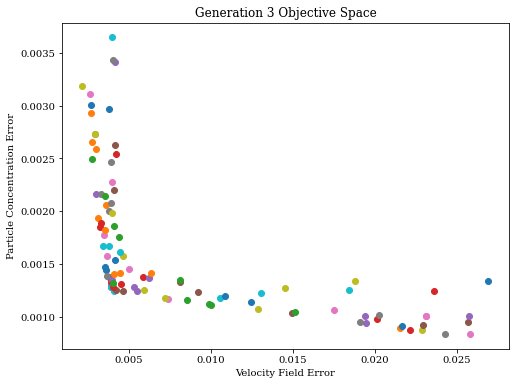

In [23]:
print('Generation', alg.n_gen)
popF = hist[0].pop.get('F')
if len(popF) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Objective Space', legend=leg, labels=obj_labels)
for ind_i, ind in enumerate(popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(plotDir + '/gen1_var_space.png')
plot.show()

#### Examine Parameter to Objective Space Mapping

In [24]:
num_pts = 10

In [1]:
# Design Space
popX = hist[0].pop.get('X')
step = int(len(popX)/num_pts)
popX = popX[::step]
plot = Scatter(title=f'Generation {gen} Design Space', legend=True, labels=var_labels)
for ind_i, ind in enumerate(popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(plotDir + '/gen1_var_space-sparse.png')
# plot.show()

NameError: name 'hist' is not defined

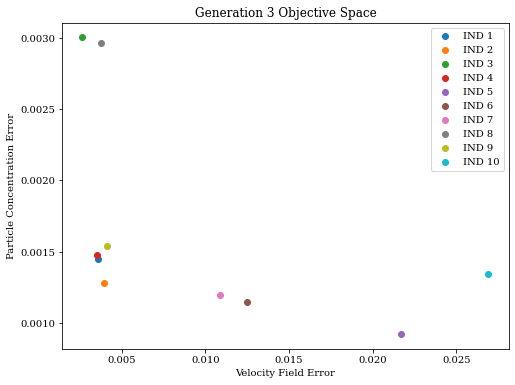

In [26]:
# Objective Space
popF = hist[0].pop.get('F')
step = int(len(popF)/num_pts)
popF = popF[::step]
plot = Scatter(title=f'Generation {gen} Objective Space', legend=True, labels=obj_labels)
for ind_i, ind in enumerate(popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(plotDir + '/gen1_obj_space-sparse.png')
# plot.show()

### Display any visualizations or other data saved in individuals folders

In [27]:
n_ind = 10 # number of individuals to display
fname = 'plt.png' # file in individual's folders 
genDir = os.path.join(optDatDir, 'gen1')

In [28]:
genEnts = os.listdir(genDir)
steps = int(len(genEnts)/n_ind)
genEnts = genEnts[::steps]
for genEnt in genEnts:
    genEntPath = os.path.join(genDir, genEnt)
    if os.path.isdir(genEntPath):
        indDir = genEntPath
#         print('Individual:', indDir)
        ### DISPLAY DATA FROM INDIVIDUAL'S DIRECTORY ###
        # EXAMPLE: dislay PNG 
    #     from IPython.display import Image, display
    #     fn = os.path.join(indDir, fname)
    #     display(Image(filename=fn))

In [29]:
popX = hist[0].pop.get('X')
popF = hist[0].pop.get('F')
print(type(popX))
print(popX.dtype)

<class 'numpy.ndarray'>
object


In [30]:
popX = popX.astype(float)
# print(popX)
print(popX.dtype)

float64


In [31]:
os.makedirs(mapDir, exist_ok=True)

### Plot every parameter and objective against each other 

In [32]:
%%capture
# ^ suppresses output
from scipy.stats import linregress
##### Variable vs. Objective Plots ######
# extract objectives and variables columns and plot them against each other
popX = hist[0].pop.get('X').astype(float)
popF = hist[0].pop.get('F').astype(float)
mapPaths = []
for x_i, x in enumerate(popX.transpose()):
    for f_i, f in enumerate(popF.transpose()):
        plot = Scatter(title=f'{var_labels[x_i]} vs. {obj_labels[f_i]}',
                       labels=[var_labels[x_i], obj_labels[f_i]], 
                       legend = True,
                      )
        xf = np.column_stack((x,f))
        plot.add(xf)
        ### Linear best fit line 
#         m, b, r_value, p_value, std_err = linregress(x, f)
#         r_squared = r_value**2
#         xy = np.column_stack((x, m*x+b))
#         plot.n_dim = 2
#         plot._do()
#         plot.plot(plot.ax, 'line', xy, label='Best Linear Fit', c='r')
#         plot.ax.text(min(xf[:,0]), max(xf[:,1]), 'Best Linear Fit', 
#                      horizontalalignment='left',
#                      c = 'r',
#                      size = 16
#                     )
#         plot.ax.text(max(xf[:,0]), max(xf[:,1]), r'$r^2$={0:.4f}'.format(r_squared), 
#                      horizontalalignment='right',
#                      c = 'r',
#                      size = 16
#                     )
        ### Polynomial best fit lines
        for d in range(1, 3+1):
            coefs = np.polyfit(x, f, d)
            y = np.polyval(coefs, x)
            xy = np.column_stack((x, y))
            plot.add(xy, label=f'Order {d} Best Fit', marker='x', s =10)
        fName = f'{var_labels[x_i].replace(" ", "_")}-vs-{obj_labels[f_i].replace(" ", "_")}.png'
        path = os.path.join(mapDir, fName)
        mapPaths.append(path)
        plot.save(path)
#         plot.show()

### Mapping Generation 1
Remember that for each plot the parameters(s) not labeled are also varying. 

Therefore, if a strong relationship is seen in these plots then it is likely a relationship independent of the other variable.


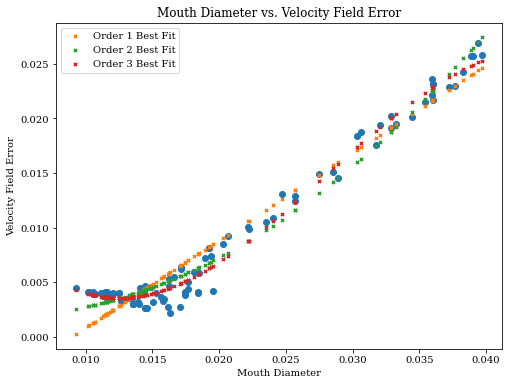

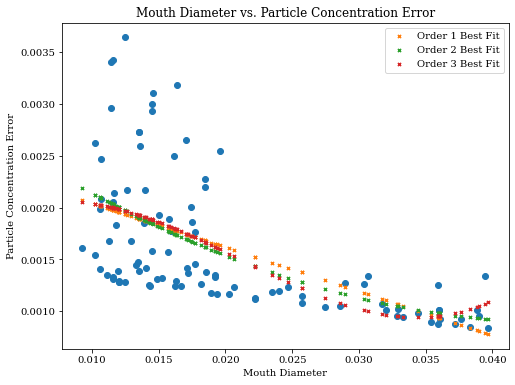

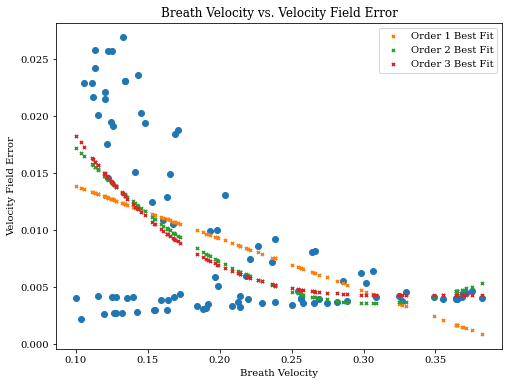

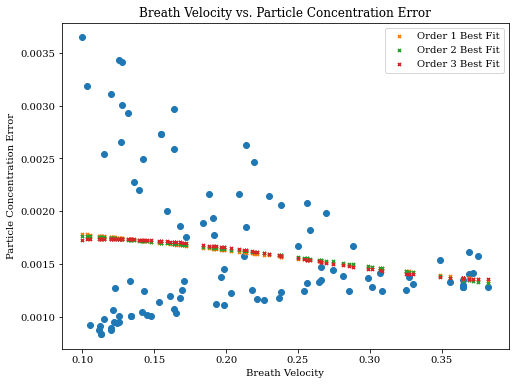

In [33]:
from IPython.display import Image, display
for mapPath in mapPaths:
    display(Image(filename=mapPath))

### Optimization Algorithm Convergence

In [34]:
n_evals = np.array([e.evaluator.n_eval for e in hist])
opt = np.array([e.opt[0].F for e in hist])
print('Number of Evaluations:', n_evals)
# print('Optimal Objectives:', opt)

Number of Evaluations: [232 298 364 430 496]


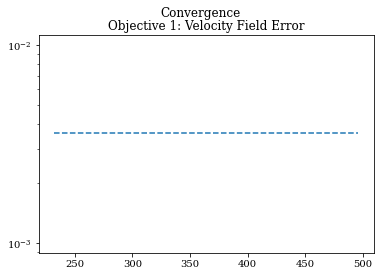

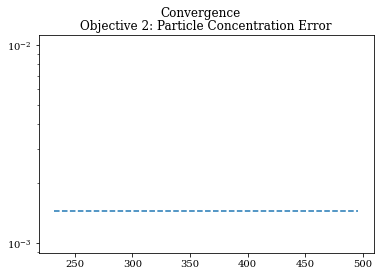

In [35]:
for obj_i in range(len(opt[0])):
    opt_obj = opt[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence')
    plt.title(f'Objective {obj_i+1}: {obj_labels[obj_i]}')
    plt.plot(n_evals, opt_obj, "--")
    plt.yscale("log")
    plt.savefig(os.path.join(plotDir, f'convergence-obj{obj_i}_{obj_labels[obj_i]}'))
    plt.show()

### Performance Indicator - Hypervolume
https://pymoo.org/misc/performance_indicator.html#Hypervolume

Maximize hypervolume from reference point. 

In [36]:
all_obj = [alg.pop.get('F') for alg in hist]

In [37]:
mean_all_obj = []
for obj_i in range(n_obj):
    mean_all_obj.append(np.mean([np.mean(obj_g[:,obj_i]) for obj_g in all_obj]))
print(mean_all_obj)

[0.008989402172825216, 0.0016067679931663754]


In [38]:
mean_g1_obj = []
popF = hist[-1].pop.get('F')
for obj_i in range(n_obj):
    mean_g1_obj.append(np.mean(popF[:,obj_i]))
print(mean_g1_obj)

[0.009273201800445191, 0.0015761228822800104]


In [39]:
ref_pt = [4, 4]
ref_pt = mean_g1_obj
ref_pt = mean_all_obj
sf = 1000
ref_pt = [mean_obj*sf for mean_obj in mean_g1_obj]

In [40]:
from pymoo.factory import get_performance_indicator
hv = get_performance_indicator("hv", ref_point=np.array(ref_pt))

In [41]:
for gen, alg in enumerate(hist):
    print('Generation', gen+1, f"hypervolume {hv.do(alg.pop.get('X'))}")

Generation 1 hypervolume 13.672357487273462
Generation 2 hypervolume 13.66565714736976
Generation 3 hypervolume 13.664670362907913
Generation 4 hypervolume 13.664351486321593
Generation 5 hypervolume 13.669064430704871


### Print Final Generation 

In [42]:
max_disp_len = 20

In [43]:
if len(algorithm.pop.get('X')) < max_disp_len:
    print('FINAL POPULATION')
    print('Parameters')
    print(algorithm.pop.get('X'))
    print('Objectives')
    print(algorithm.pop.get('F'))

### Print Every Generation

In [44]:
if algorithm.n_gen < 10 and len(algorithm.pop.get('X')) < 10:
    print('EVERY GENERATION')
    for gen in range(algorithm.n_gen):
        print(f'generation {gen}')
        var_g = algorithm.callback.data['var'][gen]
        obj_g = algorithm.callback.data['obj'][gen]
        for ind in range(len(var_g)):
            var_i = var_g[ind]
            obj_i = obj_g[ind]
            print(f'ind{ind}: ', end='')
            for n in range(len(var_i)):
                print(f'{var_labels[n]}: {var_i[n]}', end=' ')
            print(' // ', end='')
            for n in range(len(obj_i)):
                print(obj_labels[n] + ':' + '%.3f' % obj_i[n], end=' ')
            print()

### All Design Points

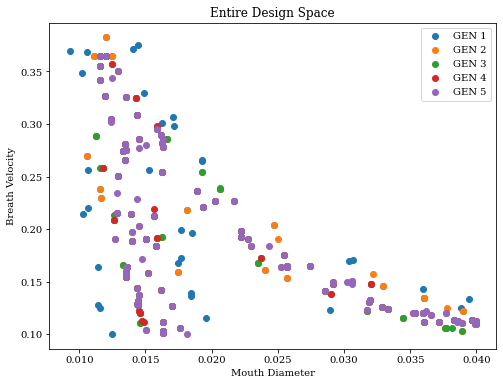

In [45]:
if n_var > 3: # plot without labels
    print('CAN NOT REPRESENT DESIGN SPACE IN 3D. USING ')
    plot = Scatter()
    plot.add(algorithm.pop.get('X')[:10])

# All design points
else: 
    if algorithm.n_gen < 15:
        leg = True
    else:
        leg = False
    plot = Scatter(title='Entire Design Space', legend=leg, labels=var_labels)
    for g, alg in enumerate(hist):
        plot.add(alg.pop.get('X'), label=f'GEN {g+1}')

# save plot to png file
plot.save(plotDir + '/entire_design_space.png')
plot.show()

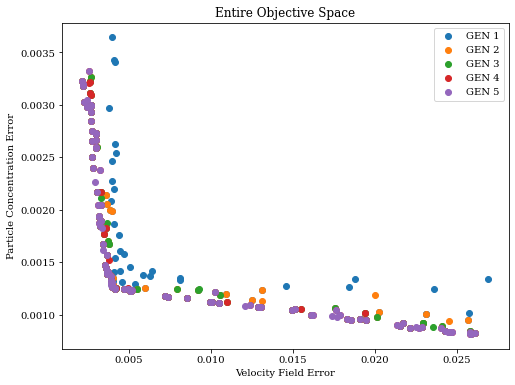

In [46]:
# All objective points
if algorithm.n_gen < 15:
    leg = True
else:
    leg = False
plot = Scatter(title='Entire Objective Space', legend=leg, labels=obj_labels)
for g, alg in enumerate(hist):  # range(algorithm.n_gen)
    plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
# if pf is not None:
#     plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.save(plotDir + '/entire_obj_space.png')
plot.show()

### Last 10 Generation of Parameter Space

In [47]:
# Last 10 generations
# last 10 gens. design points
if algorithm.n_gen > 10:
    #### Design Space ####
    if n_var > 3: # plot without labels
        print('CAN NOT REPRESENT OBJECTIVE SPACE IN 3D. Using Pairwise Scatter Plots')
        plot = Scatter(figsize=(10, 8))
        plot.add(algorithm.pop.get('X')[:10])
    # Last 10 generations of objective points
    else: 
        plot = Scatter(title='Last 10 Generations Design Space', legend=True, labels=var_labels)
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('X'), label=f'GEN {g+1}')
    # save design space plot
    plot.save(plotDir + '/final_10_design_space.png')
    plot.show()

### Last 10 Generation of Objective Space

In [48]:
### Objective Space ####
if algorithm.n_gen > 10:
    if n_obj >3:
        plot = Scatter()
        plot.add(algorithm.pop.get('F')[:10])
    else:
        # last 10 gens. objective points
        plot = Scatter(title='Last 10 Generations Objective Space', legend=True, labels=obj_labels)
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('F'), label=f'GEN {g+1}')

    # save objective space plot
    plot.save(plotDir + '/final_10_obj_space.png')
    plot.show()

### Latest Generation

#### Latest Generation: Parameter Space

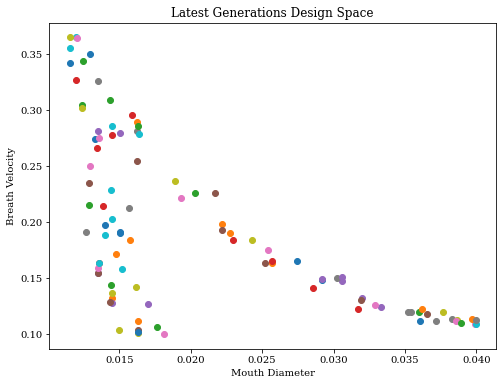

In [49]:
plot = Scatter(title='Latest Generations Design Space', legend=False, labels=var_labels)
for ind_i, ind in enumerate(latest_popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(plotDir + '/latest_var_space.png')
plot.show()

#### Latest Generation: Objective Space

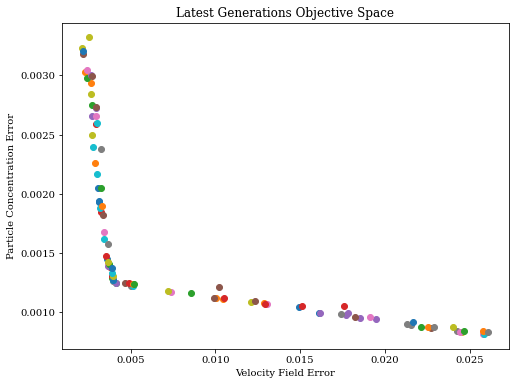

In [50]:
plot = Scatter(title='Latest Generations Objective Space', legend=False, labels=obj_labels)
for ind_i, ind in enumerate(latest_popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save objective space plot
plot.save(plotDir + '/latest_pop_obj_space.png')
plot.show()

### Latest Generation's Top Individuals

In [51]:
n_topInds = 15

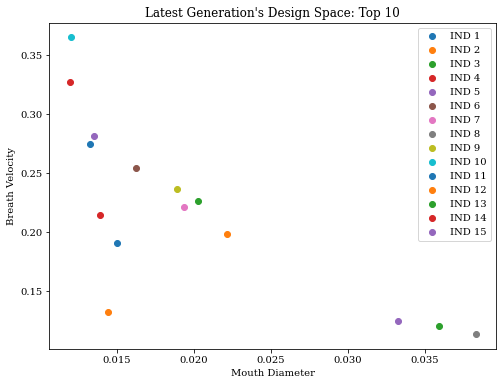

In [52]:
popX = algorithm.pop.get('X')
popX = popX[:n_topInds]
plot = Scatter(title='Latest Generation\'s Design Space: Top 10', legend=True, labels=var_labels)
for ind_i, ind in enumerate(popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(plotDir + '/latestGen_varSpace_topInds.png')
plot.show()

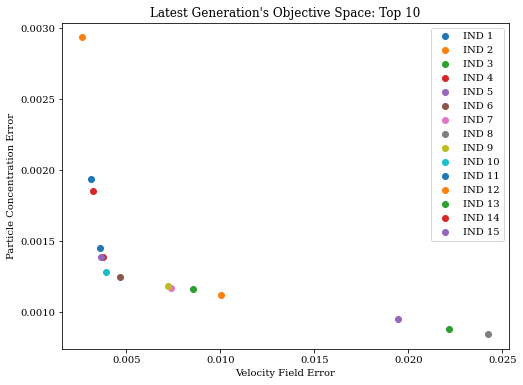

In [53]:
popF = algorithm.pop.get('F')
popF = popF[:n_topInds]
plot = Scatter(title='Latest Generation\'s Objective Space: Top 10', legend=True, labels=obj_labels)
for ind_i, ind in enumerate(popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save objective space plot
plot.save(plotDir + '/latestGen_objSpace_topInds.png')
plot.show()

### Best of Objectives 

#### Minimum of Each Objective: Top and Bottom of Pareto Front

In [54]:
n_topInds = n_topInds
### choose generation 
alg = algorithm
# alg = hist[5]

In [55]:
popX = alg.pop.get('X')
popF = alg.pop.get('F')
for obj_i in range(n_obj):
    popF_obj = popF[:,obj_i]
    ind = np.argmin(popF_obj)
    print('Objective - %s: %.5f' % (obj_labels[obj_i], popF_obj[obj_i]))
    print(f'      Individual {ind+1} - ', end='')
    for var_i in range(n_var):
        print('%s: %.5f' %(var_labels[var_i], popX[ind][var_i]), end='')
        if var_i < n_var-1:
            print('  |  ', end='')
    print()

Objective - Velocity Field Error: 0.00358
      Individual 39 - Mouth Diameter: 0.01634  |  Breath Velocity: 0.10072
Objective - Particle Concentration Error: 0.00293
      Individual 47 - Mouth Diameter: 0.03987  |  Breath Velocity: 0.10922


#### List Top Individuals

In [56]:
n_topInds
### choose generation 
alg = algorithm
# alg = hist[5]

In [57]:
popF = alg.pop.get('F')[:n_topInds]
popX = alg.pop.get('X')[:n_topInds]
for ind in range(n_topInds):
    indF = popF[ind]
    indX = popX[ind]
    print(f'Individual {ind+1} - ', end='')
    for var_i in range(n_var):
        print('%s: %.5f' %(var_labels[var_i], popX[ind][var_i]), end='')
        if var_i < n_var-1:
            print('  |  ', end='')
    print()
    print('     Objectives - ', end='')
    for obj_i in range(n_obj):
        print('%s: %.5f' % (obj_labels[obj_i], indF[obj_i]), end='')
        if obj_i < n_obj-1:
            print('  |  ', end='')            
    print()
    print()

Individual 1 - Mouth Diameter: 0.01329  |  Breath Velocity: 0.27429
     Objectives - Velocity Field Error: 0.00358  |  Particle Concentration Error: 0.00145

Individual 2 - Mouth Diameter: 0.01446  |  Breath Velocity: 0.13202
     Objectives - Velocity Field Error: 0.00267  |  Particle Concentration Error: 0.00293

Individual 3 - Mouth Diameter: 0.02027  |  Breath Velocity: 0.22644
     Objectives - Velocity Field Error: 0.00855  |  Particle Concentration Error: 0.00116

Individual 4 - Mouth Diameter: 0.01389  |  Breath Velocity: 0.21409
     Objectives - Velocity Field Error: 0.00322  |  Particle Concentration Error: 0.00185

Individual 5 - Mouth Diameter: 0.03329  |  Breath Velocity: 0.12437
     Objectives - Velocity Field Error: 0.01947  |  Particle Concentration Error: 0.00095

Individual 6 - Mouth Diameter: 0.01623  |  Breath Velocity: 0.25446
     Objectives - Velocity Field Error: 0.00467  |  Particle Concentration Error: 0.00124

Individual 7 - Mouth Diameter: 0.01936  |  Bre

### Best Individuals Display Data 

Genetic algoithm should store the best individuals at the beginning of the latest population. 

In [58]:
# how many individuals at beginning of population you want to look at 
# ind_max = int(algorithm.pop_size * (1/4)) # look at a fraction of the population
ind_max = 10
# make sure max_ind does not exceed population size
if ind_max > algorithm.pop_size:
    print('ind_max greater than population size')
    ind_max = algorithm.pop_size

In [59]:
### Open latest generation folder ###
# g = len(hist) - 1
# genDir = os.path.join(optDatDir, f'gen{g}')
# pop = hist[g].pop
# for ind in range(1, ind_max):
#     indDir = os.path.join(genDir, f'ind{ind}')
#     ind_x = pop.get('X')[ind]
#     print(f'Individual {ind} - ', end='')
#     for var in range(n_var):
#           print(f'{var_labels[var]}: {pop.get("X")[ind][var]}, ', end='')
#     print()
#     print(f'Entities in individual {ind} directory [{indDir}]: ')
#     ents = os.listdir(indDir)
#     for ent in ents:
#         print(f'     {ent}')
    ### DISPLAY DATA FROM INDIVIDUAL'S DIRECTORY ###
    # EXAMPLE: dislay PNG 
#     from IPython.display import Image, display
#     fn = os.path.join(indDir, 'plt.png')
#     display(Image(filename=fn))
    
#     print()

## Heat Map Visualization

In [60]:
from pymoo.visualization.heatmap import Heatmap
# extract data
F = algorithm.pop.get('F')[:5]

In [61]:
# plot = Heatmap(
#                 figsize = (10,10),
# #                title=("Optimization", {'pad': 15}),
# #                cmap="Oranges_r",
# #                y_labels=["Solution A", "Solution B", "Solution C", "Solution D"],
#                labels=obj_labels
#               )
# plot.add(F)
# plot.show()

## Many-Objective Visualization: Parallel Coordinate Plots

In [62]:
from pymoo.visualization.pcp import PCP
# extract data
popF = algorithm.pop.get('F')

In [63]:
# plot = PCP(title=("Run", {'pad': 30}),
#            n_ticks=10,
#            legend=(True, {'loc': "upper left"}),
#            labels=["profit", "cost", "sustainability", "environment", "satisfaction", "time"]
#            )

# plot.set_axis_style(color="grey", alpha=1)
# plot.add(F, color="grey", alpha=0.3)
# plot.add(F[50], linewidth=5, color="red", label="Solution A")
# plot.add(F[75], linewidth=5, color="blue", label="Solution B")
# plot.show()

In [64]:
# plot.reset()
# plot.normalize_each_axis = False
# plot.bounds=[[1,1,1,2,2,5],[32,32,32,32,32,32]]
# plot.show()

#### Decision Making 

In [65]:
# if pf is not None:
#     from pymoo.factory import get_decision_making

#     dm = get_decision_making("high-tradeoff")

#     I = dm.do(pf)

#     plot = Scatter(title='Pareto Front: High Tradeoff Points')
#     plot.add(pf, alpha=0.2)
#     plot.add(pf[I], color="red", s=100)
#     plot.save(plotDir + '/pf-high-tradeoff')

### Running Metric

In [66]:
# from pymoo.util.running_metric import RunningMetric

# running = RunningMetric(
#                         delta_gen=5,
#                         # n_plots=4,
#                         only_if_n_plots=True,
#                         key_press=False,
#                         do_show=True)

# running.notify(algorithm)

### Archive Previous Optimization Study Data

In [67]:
# from pymooCFD.util.handleData import archive 
# archive('dump', background=False)